## Transforms and Text Position 轉換和文本位置

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')

> In Matplotlib, this is done by modifying the *transform*.The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

 Matplotlib通過*轉換*完成這項工作。一般來說，用戶很少需要關注這些轉換的細節，但是當考慮將文本在圖表上展示時，這些知識卻比較有用。在這種情況中，下面三種定義好的轉換是比較有用的：

- `ax.transData`：與數據坐標相關的轉換
- `ax.tranAxes`：與Axes尺寸相關的轉換（單位是axes的寬和高）
- `ax.tranFigure`：與figure尺寸相關的轉換（單位是figure的寬和高）

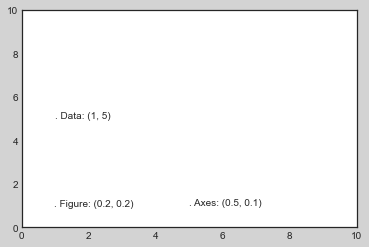

In [2]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)   # ax.transData：與數據坐標相關的轉換
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes) #ax.tranAxes：與Axes尺寸相關轉換（單位是axes寬和高）
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure); #ax.tranFigure：與figure尺寸轉換（單位是figure的寬和高）

> The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels.
The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size.The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

`transData`坐標給定的是通常使用的x和y軸坐標位置。 `transAxes`坐標給定的是從axes左下角開始算起（白色區域）的坐標位置，使用的是寬度和長度的佔比。 `transFigure`坐標類似，給定的是從figure左下角開始算起（灰色區域）的坐標位置，使用的也是寬度和長度的佔比。因此如果我們改變了軸的最大長度，只有`transData`坐標會收到影響，其他兩個還是保持在相同位置：

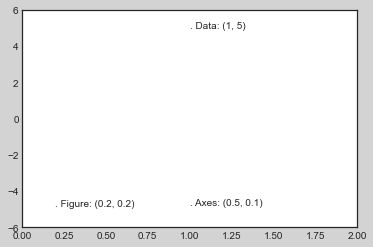

In [3]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation 箭頭和標註

> Drawing arrows in Matplotlib is often much harder than you'd bargain for. I'd suggest using the ``plt.annotate()`` function. This function creates some text and an arrow, and the arrows can be very flexibly specified.

在Matplotlib中繪製箭頭比你想像的難得多。建議使用`plt.annotate()`函數。這個函數會繪製一些文字以及一個箭頭，並且箭頭可以非常靈活的進行配置。

Text(5, 1.5, 'second')

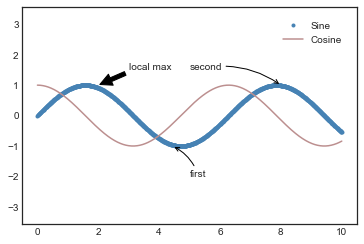

In [4]:
data = np.linspace(0,10, 1000)  #產生 0~10區間的 等間隔序列
fig, ax = plt.subplots()

plt.plot(data, np.sin(data), '.', color='SteelBlue', label='Sine')
plt.plot(data, np.cos(data), '-', color='RosyBrown', label='Cosine')

ax.axis('equal')
ax.legend(loc='upper right',shadow=True)  
ax.legend(loc='upper left', frameon=False)  #指定圖例位置並且去除邊框
ax.legend(loc='lower center',frameon=False, ncol=2)  #我們可以使用ncol屬性設置圖例中每行的列數：
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1) # 圓角方框（fancybox）方框透明度（alpha）或修改文字邊距

#### 標注 annotate #####

             # word      #data      #word position 
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),)

ax.annotate('first', xy = (4.44,-1), xytext = (5,-2), 
            arrowprops = dict(arrowstyle='->', connectionstyle="arc3,rad=.2"),)

ax.annotate('second', xy = (8,1), xytext = (5,1.5), 
            arrowprops = dict(arrowstyle='->', connectionstyle="arc3,rad=-.2"))

> The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available.
These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities.
Let's demonstrate several of the possible options using the birthrate plot from before:

箭頭的樣式是使用`箭頭屬性`字典值進行控制的，裡面有很多可用的參數。這些參數在Matplotlib的在線文檔中已經有了很詳細的說明，因此在這裡就不將這部分內容重複介紹一遍了。我們在前面出生率圖上再使用一些參數進行更多的說明：

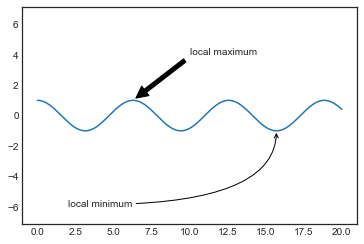

In [5]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

             # word        #data        #word position 
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"));

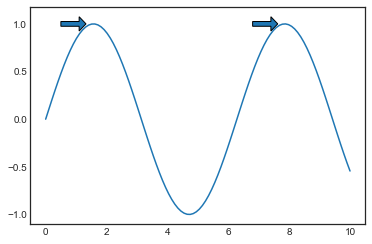

In [6]:
fig, ax  = plt.subplots(1,1)

import numpy as np
x = np.linspace(0, 10, 100)
ax.plot(x,np.sin(x)) 

ax.arrow(0.5,1, 0.6,0, width = 0.05)
ax.arrow(6.8,1, 0.6,0, width = 0.05)

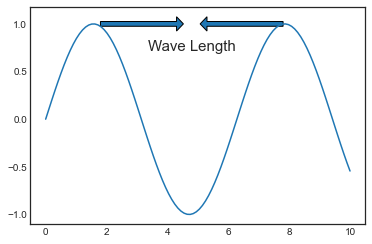

In [7]:
fig, ax  = plt.subplots(1,1)
ax.plot(x,np.sin(x)) 
ax.text(0.35,0.8,'Wave Length', fontsize = 15,transform=ax.transAxes)
ax.arrow(1.8,1, 2.5,0, width = 0.05)
ax.arrow(7.8,1, -2.5,0, width = 0.05)

##  Adding Annotations and Drawings on a Plot

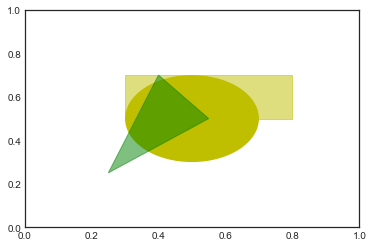

In [8]:
fig, ax = plt.subplots(1,1)

circle = plt.Circle((0.5, 0.5), 0.2, fc='y')
ax.add_patch(circle)

rect = plt.Rectangle((0.3, 0.5), 0.5, 0.2, color='y', alpha= 0.5)
ax.add_patch(rect)

tri = plt.Polygon([[0.25, 0.25], [0.55, 0.5], [0.4, 0.7]], color='g', alpha=0.5)
ax.add_patch(tri)

## Example: Effect of Holidays on US Births 節假日對美國出生率的影響

> Let's return to some data we worked with earler, in ["Example: Birthrate Data"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

本例中的數據是前面章節我們已經用過的（參見["例子：出生率"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data)），當時我們對年內的平均出生數據創建了一個圖表；就像前面已經提到的，這個數據可以在 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下載。

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_7012/1563373283.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


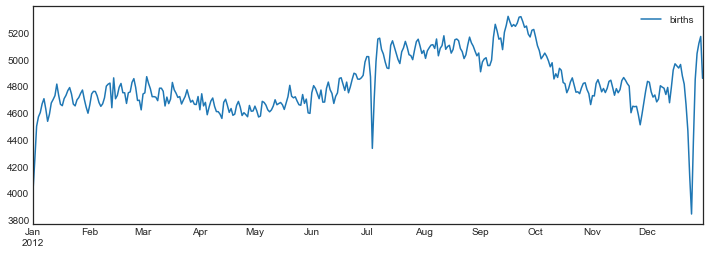

In [9]:
births = pd.read_csv('input/pd-births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

> The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.

`ax.text`方法接收x位置、y位置、一個字符串和額外可選的關鍵字參數可以用來設置顏色、大小、樣式、對齊等文本格式。上面我們使用了`ha='right'`和`ha='center'`，這裡的`ha`是*hirizonal alignment（水平對齊）*的縮寫。

Text(2012-12-25, 3850, 'Christmas ')

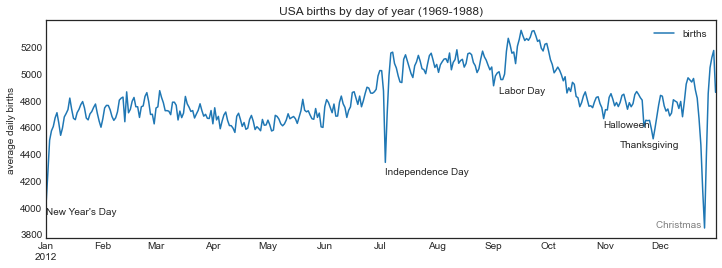

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labor Day")
ax.text('2012-10-31', 4600, "Halloween")
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)  # style = dict(size=10, color='gray')

> You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

上圖中箭頭和文字框都非常詳盡了：可以看出你幾乎可以使用`plt.annotate`創建任何你想要的箭頭樣式。不幸的是，這意味著這種特性都需要手工進行調整，因此如果需要獲得印刷質量的圖像，這將是一個非常耗費時間的工作。最後，必須指出，上述這種多種樣式混合的方式來展現數據肯定不是最佳實踐，這裡只是為了盡可能多的介紹可用的參數。

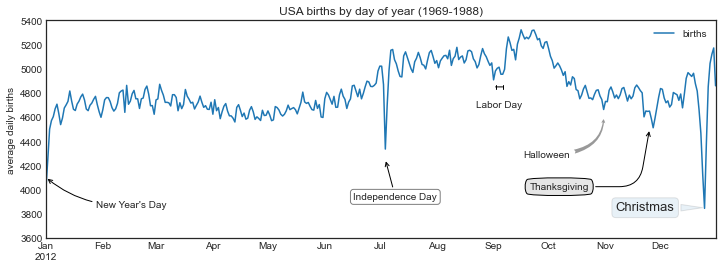

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

             # word         #data                   #word position 
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 設置圖表標題和坐標軸標記
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

ax.set_ylim(3600, 5400);